Link to video here: [Group 5 Video](https://youtu.be/0yejzTTfEP4)

Import libraries that will be used

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import networkx.generators.small as gen
from networkx.algorithms import traversal
from networkx import algorithms

Import the edge list. The data is an unweighted, symmetrical list between two faceook users, or nodes.

In [2]:
g = nx.read_edgelist("0.edges", create_using = nx.Graph(), nodetype = int)

NetworkX has a info() function that can display basic information about the graph.

In [3]:
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 333
Number of edges: 2519
Average degree:  15.1291


The 'Average degree' is the average amount of connections a node has.

Using the shortest_path() and shortest_path_length() functions we can find the shortest distance between any two nodes.
For example, we will use nodes 236 and 294.

In [4]:
nx.shortest_path(g, 236, 294)

[236, 26, 277, 294]

In [5]:
nx.shortest_path_length(g, 236, 294)

3

In [6]:
import csv
import pandas as pd
from itertools import combinations

data = open("0.edges", 'r')
reader = csv.reader(data, delimiter=' ')
allRows = [tuple(row) for row in reader]
introws = [(int(x), int(y)) for x, y in allRows]
df_rows = pd.DataFrame(introws)
df_rows.columns = ['label1', 'label2']
nodes = df_rows['label1'].unique()

combination_list = list(combinations(nodes, 2)) 

In [9]:
def get_max_path(g, combination_list):
    max_path = 0
    
    for i in range(0,len(combination_list)):
        combo = combination_list[i]
        try:
            path = nx.shortest_path_length(g, int(combo[0]), int(combo[1]))
        except:
            path = 0
            # print ("No path for" + " " + str(combo[0]) + " " + str(combo[1]))
        
    if path > max_path:
        max_path = path
    else:
        max_path
    
    return (max_path)


In [10]:
get_max_path(g, combination_list)

10

To find the diameter of the graph, we need to fix a small problem. Our data has several subgroups or clusters that aren't connected. Below is the display of the full graph.

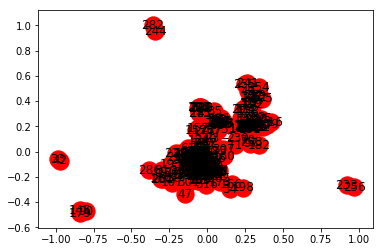

In [11]:
nx.draw_networkx(g)

To find the biggest cluster, we use the connected_component_subgraphs() function which lists all the separate clusters. We then use the max() function to find the biggest cluster by length

In [12]:
big_g = max(nx.connected_component_subgraphs(g), key=len)

Displaying the resulting cluster shows every node is connected.

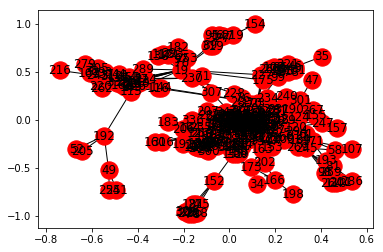

In [13]:
nx.draw_networkx(big_g)

To find the diameter of the resulting cluster, we use the diameter() function.

In [14]:
nx.diameter(big_g)

11

Final display. Code was inspired from [DataCamp](https://www.datacamp.com/community/tutorials/social-network-analysis-python) and was very helpful to create node size and colors but it didn't explain what the functions actually did. 

(-0.7158010198114126,
 1.010505081512361,
 -1.1026581000073372,
 1.1077207582475113)

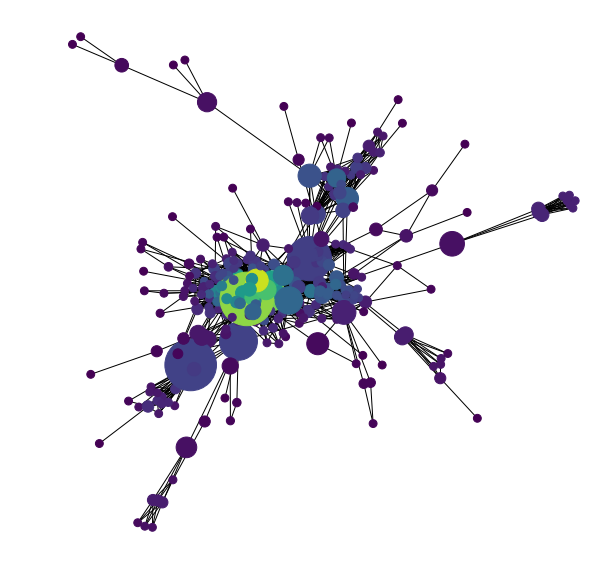

In [15]:
#Spring_Layout positions the nodes based on many factors including number of connections and weights
pos = nx.spring_layout(big_g)

#Computes the shortest-path betweenness centrality for nodes
betCent = nx.betweenness_centrality(big_g, normalized=True, endpoints=True)

#Calculate the number of edges for a node. Number multiplied is arbitrary. Output needs to be an array of floats that
#will be mapped to a color list automatically
node_color = [50.0 * big_g.degree(v) for v in big_g]

#Bigger the number multiplied creates the biggest differences in node sizes. Trial and error may be required. 
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(10,10))
nx.draw_networkx(big_g, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

In [19]:
big_g.degree(1)

16